In [1]:
from pandas import Series
from matplotlib import pyplot
# series = Series.from_csv('daily-total-female-births.csv', header=0)
import pandas as pd
df = pd.read_csv("data.csv")


In [9]:
df.head()

,time,Deg C,Degrees,ms
0,01-Jan-93 5:30 AM,13.8,24.4,4.99
1,01-Jan-93 6:30 AM,14.9,23.2,4.79
2,01-Jan-93 7:30 AM,17.8,23.9,3.92
3,01-Jan-93 8:30 AM,20.7,40.1,6.27
4,01-Jan-93 9:30 AM,22.8,46.7,7.81


In [3]:
df_new = pd.read_csv("temp")

In [64]:
series = pd.Series(df["ms"][:2000])

0    4.99
1    4.79
2    3.92
3    6.27
4    7.81
Name: ms, dtype: float64


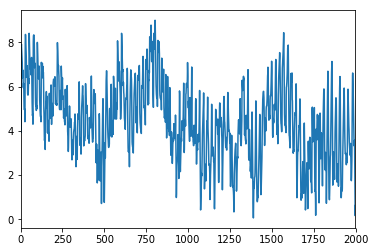

In [65]:

print(series.head())
series.plot()
pyplot.show()

Test MSE: 0.069


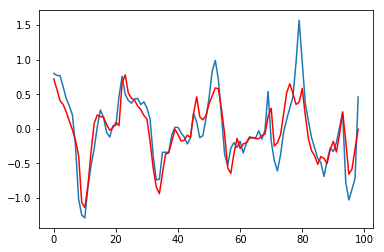

In [66]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
import numpy
 
# create a difference transform of the dataset
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return numpy.array(diff)
 
# Make a prediction give regression coefficients and lag obs
def predict(coef, history):
	yhat = coef[0]
	for i in range(1, len(coef)):
		yhat += coef[i] * history[-i]
	return yhat
 
# series = Series.from_csv('daily-total-female-births.csv', header=0)
# split dataset
X = difference(series.values)
#size = int(len(X) * 0.7)

train, test = X[0:1900], X[1900:]
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = [train[i] for i in range(len(train))]
predictions = list()
for t in range(len(test)):
	yhat = predict(coef, history)
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [84]:
print (coef)

[-0.00344823  0.50354652 -0.21272201 -0.06195748 -0.11974628 -0.08676566
 -0.11724081 -0.04147142 -0.10460479 -0.08039091 -0.07762342 -0.07792955
 -0.12583884 -0.0715428  -0.09075264 -0.09280761 -0.08032139 -0.05007069
 -0.09483402 -0.05982227 -0.0669125  -0.04100899 -0.0912195   0.0083055
  0.44954502 -0.25830539]


In [49]:
# fit an AR model and save the whole model to file
from pandas import Series
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.ar_model import ARResults
import numpy
 
# create a difference transform of the dataset
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return numpy.array(diff)
 
# load dataset
# series = Series.from_csv('daily-total-female-births.csv', header=0)
X = difference(series.values)
# fit model
model = AR(X)
model_fit = model.fit(maxlag=6, disp=False)
# save model to file
model_fit.save('ar_model.pkl')
# save the differenced dataset
numpy.save('ar_data.npy', X)
# save the last ob
numpy.save('ar_obs.npy', [series.values[-1]])

In [50]:
# load the AR model from file
from statsmodels.tsa.ar_model import ARResults
import numpy
loaded = ARResults.load('ar_model.pkl')
print(loaded.params)
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
print(last_ob)

[ 0.00047247 -0.10441194 -0.08222186 -0.07018364 -0.06828837 -0.06568536
 -0.06077094]
[ 114.9]


In [52]:
from statsmodels.tsa.ar_model import ARResults
import numpy
# load model
model = ARResults.load('ar_model.pkl')
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
# make prediction
predictions = model.predict(start=len(data), end=len(data))
# transform prediction
yhat = predictions[0] + last_ob[0]
print('Prediction: %f' % yhat)

Prediction: 114.769661


In [54]:

import numpy
 
def predict(coef, history):
	yhat = coef[0]
	for i in range(1, len(coef)):
		yhat += coef[i] * history[-i]
	return yhat
 
# load model
coef = numpy.load('man_model.npy')
lag = numpy.load('man_data.npy')
last_ob = numpy.load('man_obs.npy')
# make prediction
prediction = predict(coef, lag)
# transform prediction
yhat = prediction + last_ob[0]
print('Prediction: %f' % yhat)

FileNotFoundError: [Errno 2] No such file or directory: 'man_model.npy'

Test RMSE: 7.664


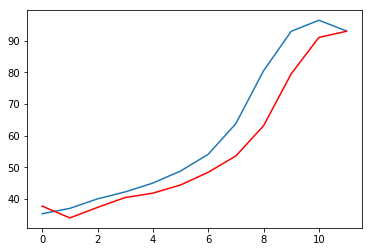

In [10]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
# series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# split into train and test sets
X = series.values
train, test = X[0:-12], X[-12:]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(4,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat)
	history.append(test[t])
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()